##  Step1: Deciding (not) to Segment
McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.



##  Step2: Specifying the Ideal Target Segment

What would your ideal target segment look like?


##  Step3: Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes:

* YUMMY
* CONVENIENT
* SPICY
* FATTENING
* GREASY
* FAST
* CHEAP
* TASTY
* EXPENSIVE
* HEALTHY
*DISGUSTING

These attributes emerged from a qualitative study con- ducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

In [1]:
# Reading And Exploring Data
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Getting the data
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## **Step4: Exploring Data**
**Checking:**
* variable name
* sample size
* first three rows
* data type
* null values

In [4]:
df.shape

(1453, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

**Tasks:**
* Extracting first 11 columns
* encoding (yes->1, No->0)
* transform to average of each value

In [8]:
data = df.iloc[:,:11]
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in data.columns:
  data[col] = encoder.fit_transform(data[col])

In [10]:
data.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

**Compute PCA and create a perceptual map**

Our goal is to get insights the data to know which attributes tend to be rated in the same way.

In [11]:
from sklearn.decomposition import PCA
pca = PCA()

comp = pca.fit_transform(data)
comp.shape

(1453, 11)

In [12]:
comp = pd.DataFrame(comp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11'])
comp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


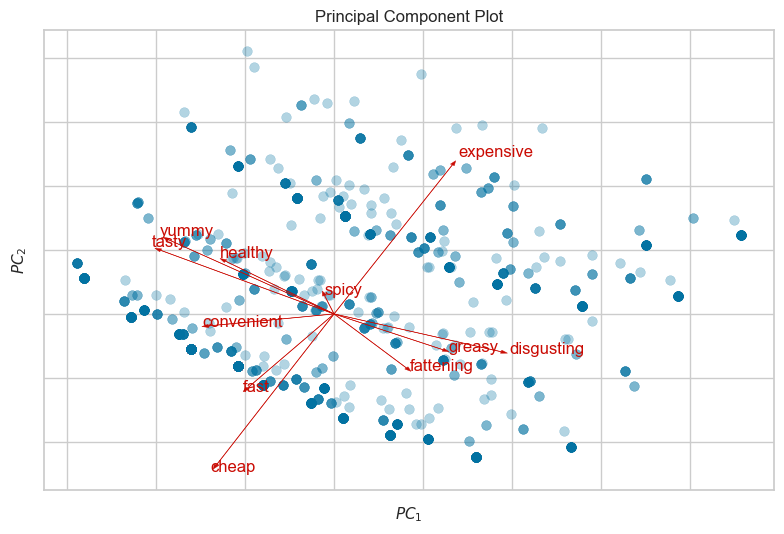

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [13]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(proj_features=True, alpha=0.3)
visualizer.fit_transform(data)
visualizer.show()

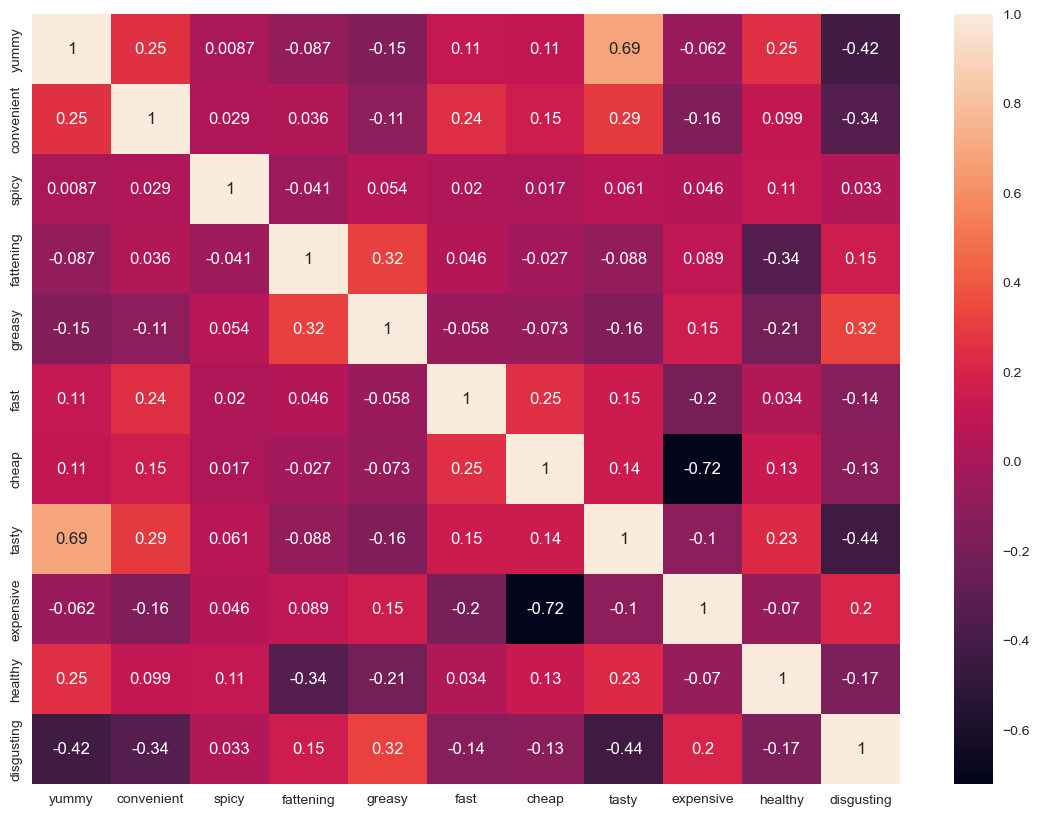

In [14]:
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, annot=True);

In [15]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [16]:
from pandas_profiling import ProfileReport

report = ProfileReport(data,title='Mcdonalds Segments ')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

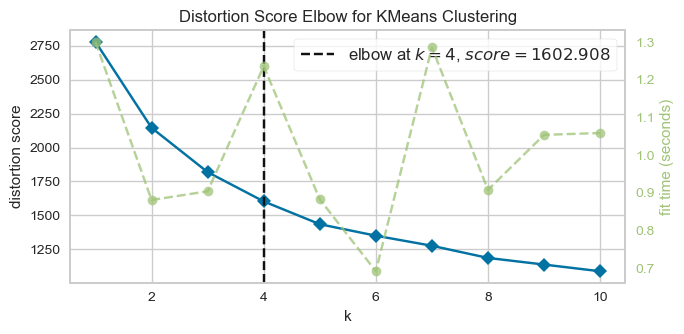

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(data)
visualizer.show()

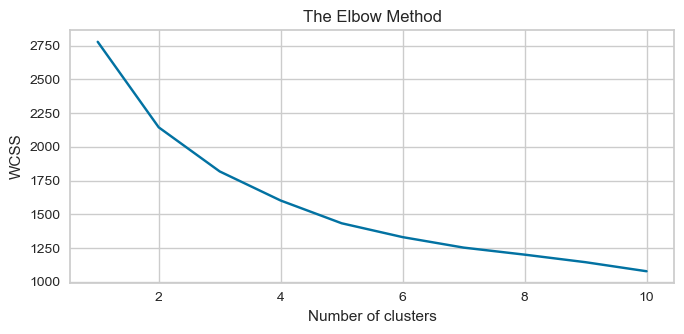

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(comp)

KMeans(n_clusters=4, random_state=42)

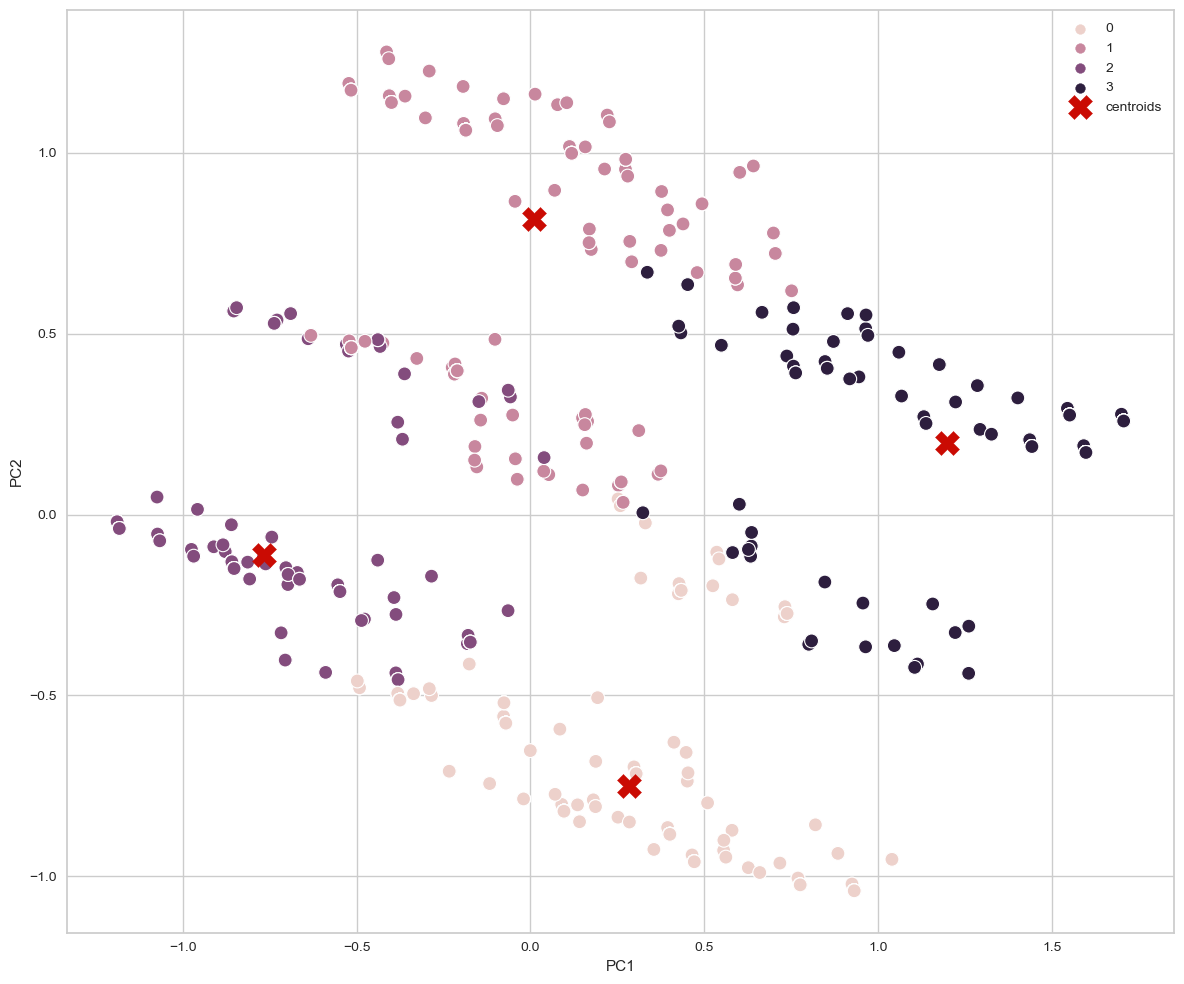

In [34]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=comp, x="PC1", y="PC2", hue=kmeans.labels_, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=300, label="centroids")
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster_num'] = y_kmeans 
y_kmeans = kmeans.fit_predict(comp)
y_kmeans

array([0, 1, 1, ..., 1, 2, 3])

In [36]:
X = comp.iloc[:, [0,1]].values

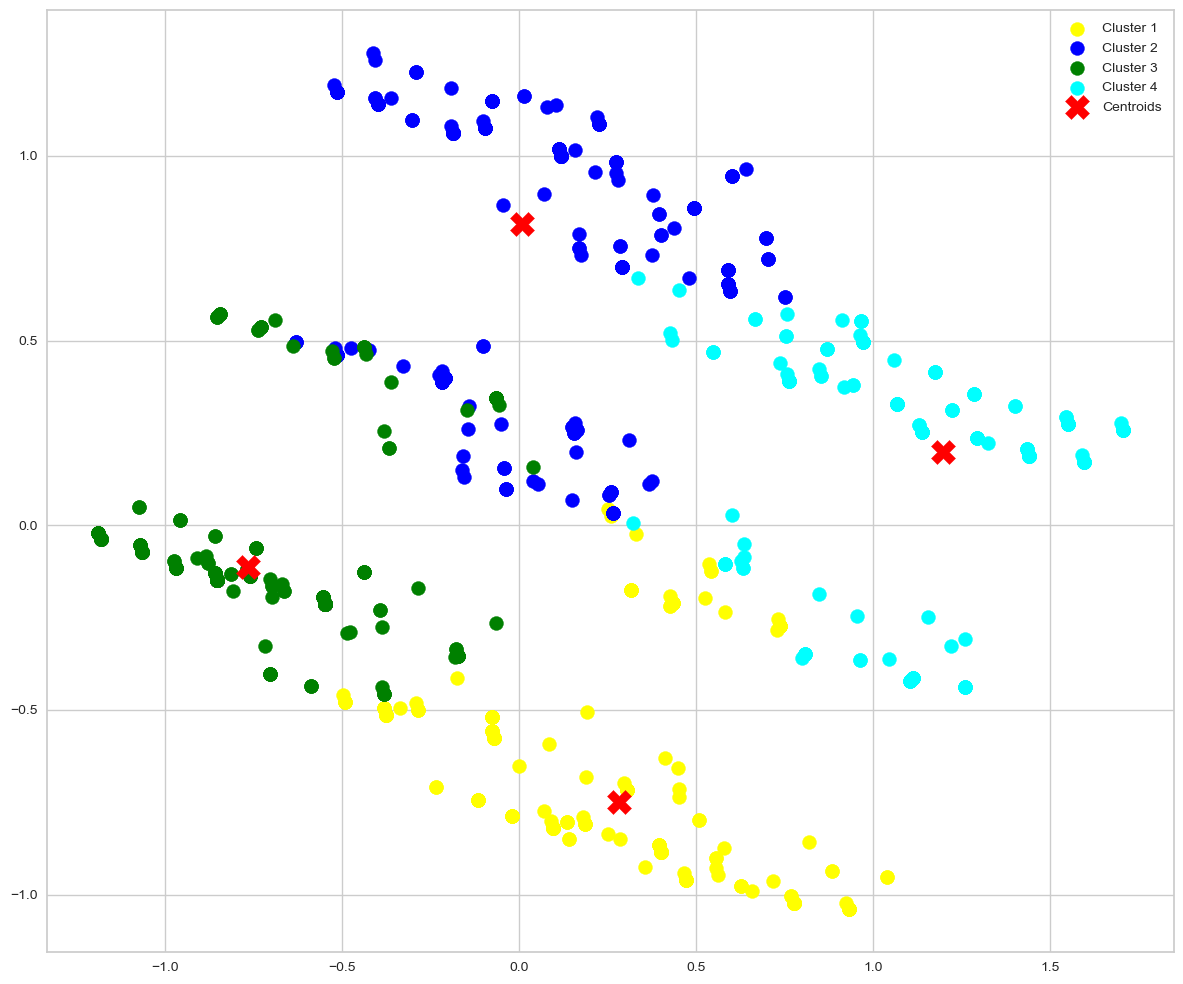

In [37]:
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s = 300, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

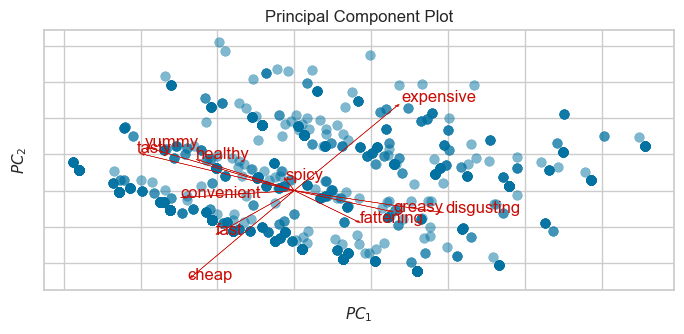

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [38]:
visualizer = PCADecomposition(proj_features=True, alpha=0.5)
visualizer.fit_transform(data)
visualizer.show()

## Step 7 Describing segments

In [20]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [91]:
from statsmodels.graphics.mosaicplot import mosaic

In [92]:
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,47,40,16,3,29,30,36,38,63,56,0
1,46,65,71,50,10,6,7,3,37,5,41
2,45,76,134,107,7,5,0,3,32,2,102
3,14,6,8,0,12,18,30,27,37,89,0


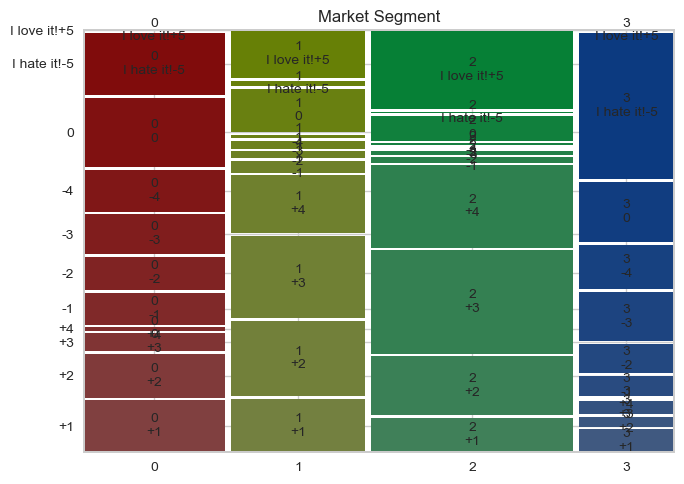

In [93]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack(), gap=0.010, title="Market Segment")

plt.show()

In [94]:
crosstab =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab

Gender,Female,Male
cluster_num,,
0,208,150
1,169,172
2,309,204
3,102,139


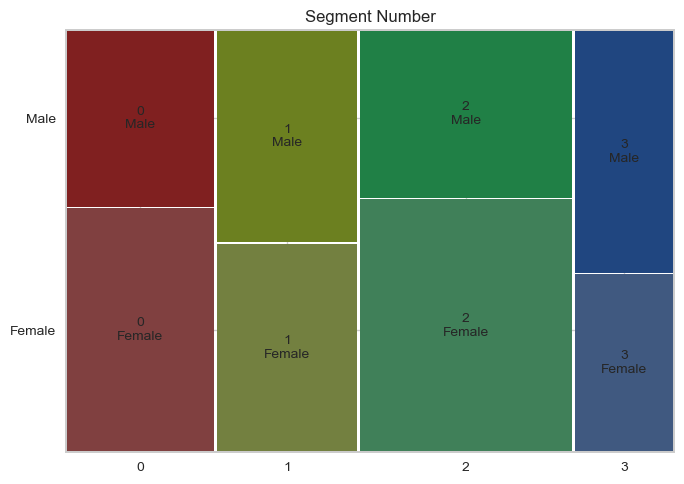

In [95]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack(), title= "Segment Number")
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

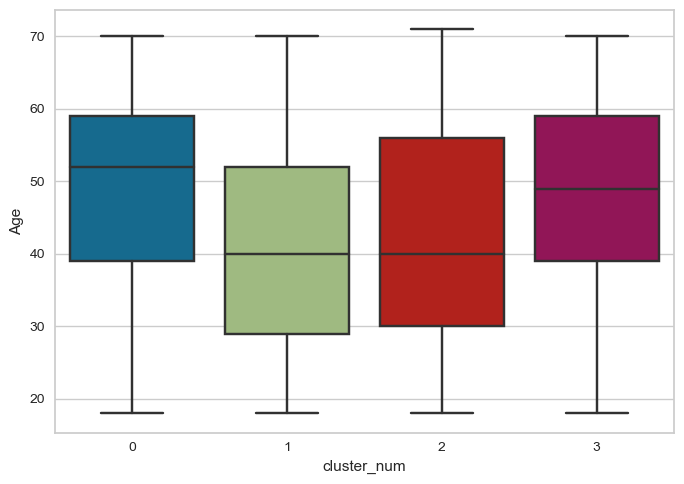

In [97]:
sns.boxplot(x="cluster_num", y="Age", data=df) 

## Step 8  **Selecting the Target Variable**

## Step 9 **Step9:Customising the Marketing Mix**